# Basics of text files

In [7]:
# the first step is to obtain a file object using open

# 'r' means read-only
file_for_reading = open('reading-file.txt','r')

# 'w' is write: will destroy the file if it already exists
file_for_writing = open('writing-file.txt', 'w')

# 'a' is append: for adding to end of the file
file_for_appending = open('appending-file', 'a')

# always close the files when done
file_for_reading.close()
file_for_writing.close()
file_for_appending.close()

In [10]:
# because you can easily forget to close your files, always use them with a block cause they get close auto
def fn_that_extracts(file):
    # does the data extraction
    return 0
filename = 'reading-file.txt'
with open(filename,'r') as f:
    data = fn_that_extracts(f)
    
# at this point, f has already been closed so don't try to access it
## process(data)

If you need to read a whole text file. you can just iterate over the line of the file using for:

In [25]:
import re
starts_with_hash = 0
lines = []
with open('input.txt', 'r') as f:
    for line in f:
        lines.append(line)
        if re.match("^#", line):
            starts_with_hash += 1
print(starts_with_hash)
print(lines)

4
['Elroy Kanye\n', '#elroykanye\n', '#kanye\n', '#elroy\n', '#vince\n']


As seen above, every line gotten ends in a newline char. you will often want to strip() it before doing anything

elroykanye@gmail.com
elroyvince@gmail.com
elroyksocial@gmail.com
elroykanye@hyrre.net
elroyvince@jjtronic.com
elroykanye@yahoo.com


<BarContainer object of 4 artists>

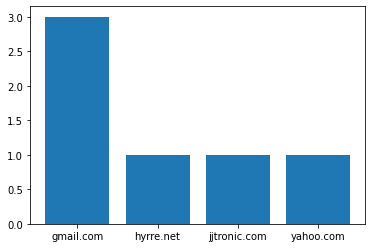

In [41]:
# take this.
# imagine you have a file full of email addresses, one per line.
# and you need to generate a histo of the domains.
from collections import Counter
import matplotlib.pyplot as plt

def get_emails(filename):
    ems = []
    with open(filename, 'r') as f:
        for line in f:
            ems.append(line.strip())
    return ems

def get_domain(email):
    return (email.split("@"))[-1]

emails = get_emails('emails.txt')
domains = []
for email in emails:
    print(email)
    domains.append(get_domain(email))
domain_counts = Counter(domains)
plt.bar(domain_counts.keys(), domain_counts.values())

# Delimited Files
For files delimited such as tab separeated or comma-separated(csv), ach line has several fields with a comma or a tab indicating where one field ends and the next starts.
This gets complicated when you have fields with commas and tabs in them, so we use the csv module from python or pandas.

<BarContainer object of 43 artists>

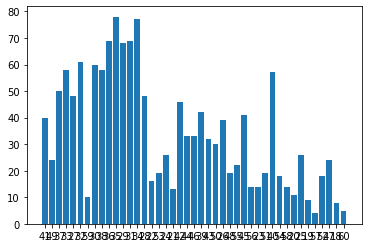

In [67]:
# for a csv/tsv file with no headers, we use csv.reader 
import csv
import matplotlib.pyplot as plt
from collections import Counter as counter

s =[]
with open('hr-employee-attrition.txt', 'r') as f:
    reader = csv.reader(f, delimiter=',')
    header = reader.__next__()
    c = 1
    for row in reader:
        # print(row)
        s.append(row[0])
plt.bar([x for x in counter(s).keys()],
        [y for y in counter(s).values()])

In [56]:
# reading a csv file with headers
def read_csv_with_headers(filename):
    with open(filename, 'r') as f:
        reader = csv.DictReader(f, delimiter=',')
        for row in reader:
            # process row
            print(row)